<div class="alert alert-block alert-success">
<h3> CMEMS Reanalysis: Seasonal, Annual Trends and Seasonal Anomalies of the Sea Surface Temperature in the Adriatic Sea</h3></div>

**Author and Team Leader:**  Ozlem OZALP <br>
**Co-authors**  Antonio VECOLI and Jacopo ALESSANDRI <br>
**Copyright:** 2022 <br>
**License:** MIT


The Sea Surface Temperature (SST) is an important physical characteristic of the oceans and is the one of the vital component of the <a href="https://gcos.wmo.int/en/essential-climate-variables/sst" target="_blank">climate system</a> . The Adriatic Sea is an elongated basin, located in the central Mediterranean, between the Italian peninsula and the Balkans.The CMEMS Mediterranean Sea Physics Reanalysis time series is provided since 01/01/1987. The SST is defined by selecting the first vertical level of the daily mean of Potential Temperature within the variable name “thetao”. The data is available and can be downloded from the following <a href="https://doi.org/10.25423/CMCC/MEDSEA_MULTIYEAR_PHY_006_004_E3R1" target="_blank">link</a>

# Introduction to WEkEO Notebook

### Data used 

| Product Description | Data Store collection ID| Product Navigator | WEkEO HDA ID | WEkEO metadata |
|:--------------------:|:-----------------------:|:-------------:|:-----------------:|:-----------------:|
| CMEMS Reanalysis: Daily Mean Potential temperature from 1987 to 2019 | MEDSEA_MULTIYEAR_PHY_006_004  | <a href="https://resources.marine.copernicus.eu/product-detail/MEDSEA_MULTIYEAR_PHY_006_004/INFORMATION" target="_blank">link</a> | EO:MO:DAT:MEDSEA_MULTIYEAR_PHY_006_004/med-cmcc-tem-rean-d | <a href="https://www.wekeo.eu/data?view=dataset&dataset=EO%3AMO%3ADAT%3AMEDSEA_MULTIYEAR_PHY_006_004" target="_blank">link</a> |

### Learning outcomes

In this notebook;

The SST has been analysed in the Adriatic Sea from 01/01/1987 to 12/12/2019. The plots are generated in Daily, Monthly, Annual and Seasonal Means. Then, the SST maps for the winter and summer seasons with their anomalies have been visualized.



<div class="alert alert-success" role="alert">

    
## <a id='TOC_TOP'></a>Contents

</div>
    
 1. [Section 1](#section1): Data processing: CMEMS Data.
 
#### THE CODE HAS THE FOLLOWING SECTIONS:


 2. [Section 2](#section2): Functions for the Data Aggregation process: Annual, Winter and Summer Seasons Aggregations.
 3. [Section 3](#section3): The SST Data Analysis and Plots: Daily, Monthly, Annual Trends and Standard Deviation.
 4. [Section 4](#section4): The Seasonal and Annual Mean Map Visualizations.
 5. [Section 5](#section5): The Seasonal Anomalies Map Visualizations.
 6. [Section 6](#section6): References.


<hr>

### Outline

In Jupyter Notebook, there are two sections of code at the top that occure before entering the main programme and includes:

1. importing modules
2. "functions_cmems.py" file which contains functions that are called in the main programme

The "functions_cmems.py" file contains calling functions to provide necessary methods for the data elaboration.
Therefore, in the initial part contains the specific functions for the aggregations and, continuing with data analysis and visualization functions and finally calculation and visualization of seasonal anomalies functions.

#### In the following <a href="https://drive.google.com/drive/u/0/folders/1D1kQBpmnS4r2Dhq7f8bkhWXC_WF8gIkD" target="_blank">link</a> you can find processed files for the data analysis and visualizations. 


<div class="alert alert-info" role="alert">

## <a id='TOC_TOP'></a> [Section 1](#section1): Data Processing

[Back to top](#TOC_TOP)
    
    


The first part of the Notebook describes how to get the data from CMEMS. The name of the CMEMS DATA is Mediterranean Sea Physics Reanalysis. The dataset name is med-cmcc-tem-rean-d and contain 33 years daily information. Thereafter, the dataset is reseized for the Adriatic Sea: 

    Time= 1987-2019
     
    Longitude: 12-22 E°  and  Latitude: 37-46 N° 

Hence, the Dataset Dimension is:
    
    Time: 12053 
    lat: 216 
    lon: 241
    depth: 1.01823
  
And finally a unique output file "CMEMS_SST" in netCDF format is prepared for the data aggregation process and can easily downloaded from the <a href="https://drive.google.com/drive/u/0/folders/1D1kQBpmnS4r2Dhq7f8bkhWXC_WF8gIkD" target="_blank">following link</a>. The file size is 2.34 GB.

#### Install Libraries from WEkEO_env.yml, which includes:
######     pip install xarray
######     pip install netCDF4
######     pip install csv
######     pip install statsmodels
######     pip install seaborn
######     conda install -c conda-forge cartopy
######     pip install regionmask
######     pip install pygeos
######     pip install --upgrade numpy
######     pip install --force-reinstall --no-binary shapely shapely (needed to be installed when shapely gives error)

#### INSTALL environment through:  conda env create --file WEkEO_env.yml




<div class="alert alert-block alert-warning">

### Note that: 
The winter Season is defined from January to April, and the Summer Season from July to October with the time coverage of 33 years,<a href="https://journals.ametsoc.org/view/journals/phoc/27/8/1520-0485_1997_027_1492_tasgcp_2.0.co_2.xml" target="_blank">REFERENCE LINK</a>.

<div class="alert alert-info" role="alert">

## <a id='TOC_TOP'></a> [Section 2](#section2): Functions for the Data Aggregation process.

#### Import Libraries

In [1]:
import xarray as xr
import pandas as pd
import numpy as np
import cartopy.feature as cfeature
import cartopy.crs as ccrs
import matplotlib.pyplot as plt
import regionmask
import matplotlib.colors

import functions_cmems as fc



import warnings
warnings.resetwarnings()
warnings.simplefilter(action='ignore', category=FutureWarning)

/opt/conda/lib/python3.8/site-packages/geopandas/_compat.py:112: UserWarning: The Shapely GEOS version (3.11.0-CAPI-1.17.0) is incompatible with the GEOS version PyGEOS was compiled with (3.10.1-CAPI-1.16.0). Conversions between both will be slow.
  warnings.warn(


### Load the Data

In [2]:
ncRawDataFileName = "WEkEO_PART_1_Aggregations/WEkEO_SST_DATA/CMEMS_SST.nc"
fc.areaPerimeter =pd.read_csv ("WEkEO_PART_1_Aggregations/WEkEO_SST_DATA/areaAdriatic.csv")
dataOutput = "Aggregations/CMEMS_SST_clipped.nc"

"areaPerimeter" is delimiting function over the area of interest. In the spatial data, the 1st column is longitude, the 2nd column is latitude. The Clipped file is saved as "CMEMS_SST_clipped.nc". 

In [3]:
rawData = xr.open_dataset(ncRawDataFileName)
clippedData = fc.ClipDataOnRegion(rawData, fc.areaPerimeter,dataOutput)

CMEMS SST Dimension: <xarray.Dataset>
Dimensions:  (time: 12053, lat: 216, lon: 241)
Coordinates:
  * time     (time) datetime64[ns] 1987-01-01T12:00:00 ... 2019-12-31T12:00:00
    depth    float32 ...
  * lat      (lat) float32 37.02 37.06 37.1 37.15 ... 45.85 45.9 45.94 45.98
  * lon      (lon) float32 12.0 12.04 12.08 12.12 ... 21.88 21.92 21.96 22.0
Data variables:
    thetao   (time, lat, lon) float32 ...
Attributes:
    Conventions:  CF-1.8
Clipped Area Dimensions:            LON        LAT
0    19.641391  39.744436
1    18.375273  39.798191
2    18.391109  39.816245
3    18.399336  39.899609
4    18.399436  39.936100
..         ...        ...
413  19.694582  39.794718
414  19.673055  39.793055
415  19.650836  39.772500
416  19.640000  39.756664
417  19.641391  39.744436

[418 rows x 2 columns]
Reseized Area: <xarray.Dataset>
Dimensions:  (time: 12053, lat: 146, lon: 188)
Coordinates:
  * time     (time) datetime64[ns] 1987-01-01T12:00:00 ... 2019-12-31T12:00:00
    depth    floa

In [4]:
ncRawDataFileName_annual_mean = "Aggregations/CMEMS_SST_clipped.nc"
annualMapsNcFile = "Aggregations/CMEMS_SST_clipped_Annual_Mean.nc"

In [5]:
rawData_annual_mean = xr.open_dataset(ncRawDataFileName_annual_mean)


The clipped file has been indexed in "months" through XARRAY then averaged by year and finally saved as "CMEMS_SST_clipped_Annual_Mean.nc" by using "GenerateAnnualMeanMaps" function

* am1 = t.sel(time=AM(t['time.month']))
* am2 = am1.groupby('time.year').mean('time')

In [6]:
clippedData_annual_mean = fc.GenerateAnnualMeanMaps(rawData_annual_mean, annualMapsNcFile)

ANNUAL MEAN for 33 years: <xarray.Dataset>
Dimensions:  (lat: 146, lon: 188, year: 33)
Coordinates:
    depth    float32 1.018
  * lat      (lat) float32 39.73 39.77 39.81 39.85 ... 45.65 45.69 45.73 45.77
  * lon      (lon) float32 12.17 12.21 12.25 12.29 ... 19.83 19.88 19.92 19.96
  * year     (year) int64 1987 1988 1989 1990 1991 ... 2015 2016 2017 2018 2019
Data variables:
    thetao   (year, lat, lon) float32 19.11 19.11 19.12 19.13 ... nan nan nan
ANNUAL MEAN for 33 years: <xarray.Dataset>
Dimensions:  (lat: 146, lon: 188, year: 33)
Coordinates:
    depth    float32 1.018
  * lat      (lat) float32 39.73 39.77 39.81 39.85 ... 45.65 45.69 45.73 45.77
  * lon      (lon) float32 12.17 12.21 12.25 12.29 ... 19.83 19.88 19.92 19.96
  * year     (year) int64 1987 1988 1989 1990 1991 ... 2015 2016 2017 2018 2019
Data variables:
    thetao   (year, lat, lon) float32 19.11 19.11 19.12 19.13 ... nan nan nan
Annual Mean minimum T: <xarray.DataArray 'thetao' ()>
array(15.038228, dtype=float

#### The Seasonal Maps with dimensions TIME, LAT and LON have been generated from "CMEMS_SST_clipped.nc" file and saved as "CMEMS_SST_WINTER_SEASON.nc" and "CMEMS_SST_SUMMER_SEASON.nc" by using "GenerateSeasonalWinter" and "GenerateSeasonalSummer" functions 
As previously noted "The winter Season" is defined between January and April through the following function:

* "GenerateSeasonalWinter"

      def WINTER(month):
    
        return (month >= 1) & (month <= 4)
      
      seasonal_data_winter = t.sel(time=WINTER(t['time.month']))

While the "The Summer Season" is defined between July and October: 

* "GenerateSeasonalSummer"

      def SUMMER(month):
        
        return (month >= 7) & (month <= 10)
      
      seasonal_data_summer = t.sel(time=SUMMER(t['time.month']))

After months selection for each season, the means for each year have been calculated:
         
       seasonal_data_winter1 = seasonal_data_winter.groupby('time.year').mean()
       seasonal_data_summer1 = seasonal_data_summer.groupby('time.year').mean()

The maximum and minimum Temperatures by Season are also printed:
       
       print("",seasonal_data_winter1.thetao.min())
       print("",seasonal_data_winter1.thetao.max())
       print("",seasonal_data_summer1.thetao.min())
       print("",seasonal_data_summer1.thetao.max())

In [7]:
winter_output= "Aggregations/CMEMS_SST_WINTER_SEASON.nc"
summer_output="Aggregations/CMEMS_SST_SUMMER_SEASON.nc"

In [8]:
SeasonWinter = fc.GenerateSeasonalWinter(rawData_annual_mean,winter_output)

Reseized Area: <xarray.Dataset>
Dimensions:  (lat: 146, lon: 188, year: 33)
Coordinates:
    depth    float32 1.018
  * lat      (lat) float32 39.73 39.77 39.81 39.85 ... 45.65 45.69 45.73 45.77
  * lon      (lon) float32 12.17 12.21 12.25 12.29 ... 19.83 19.88 19.92 19.96
  * year     (year) int64 1987 1988 1989 1990 1991 ... 2015 2016 2017 2018 2019
Data variables:
    thetao   (year, lat, lon) float32 13.69 13.7 13.72 13.75 ... nan nan nan nan
WINTER SEASON MINIMUM TEMPERATURE AT SEA SURFACE: <xarray.DataArray 'thetao' ()>
array(7.6017065, dtype=float32)
Coordinates:
    depth    float32 1.018
WINTER SEASON MAXIMUM TEMPERATURE AT SEA SURFACE: <xarray.DataArray 'thetao' ()>
array(16.397697, dtype=float32)
Coordinates:
    depth    float32 1.018
saving to  Aggregations/CMEMS_SST_WINTER_SEASON.nc
finished saving


In [9]:
SeasonSummer = fc.GenerateSeasonalSummer(rawData_annual_mean,summer_output)

Reseized Area: <xarray.Dataset>
Dimensions:  (lat: 146, lon: 188, year: 33)
Coordinates:
    depth    float32 1.018
  * lat      (lat) float32 39.73 39.77 39.81 39.85 ... 45.65 45.69 45.73 45.77
  * lon      (lon) float32 12.17 12.21 12.25 12.29 ... 19.83 19.88 19.92 19.96
  * year     (year) int64 1987 1988 1989 1990 1991 ... 2015 2016 2017 2018 2019
Data variables:
    thetao   (year, lat, lon) float32 25.26 25.27 25.28 25.29 ... nan nan nan
SUMMER SEASON MINIMUM TEMPERATURE AT SEA SURFACE: <xarray.DataArray 'thetao' ()>
array(19.326422, dtype=float32)
Coordinates:
    depth    float32 1.018
SUMMER SEASON MAXIMUM TEMPERATURE AT SEA SURFACE: <xarray.DataArray 'thetao' ()>
array(26.531475, dtype=float32)
Coordinates:
    depth    float32 1.018
saving to  Aggregations/CMEMS_SST_SUMMER_SEASON.nc
finished saving


#### The following 1D outputs have Mean sized "Latitude" and "Longitude" and are used to display trends and analysis.

In [10]:
NcFile1Doutput = "Aggregations/CMEMS_SST_clipped_1D_FIXED_DIM.nc"


In [11]:
clippedfix1=fc.Generate1DFixDim(rawData_annual_mean,NcFile1Doutput)

saving to  Aggregations/CMEMS_SST_clipped_1D_FIXED_DIM.nc
finished saving
File Dimension: <xarray.Dataset>
Dimensions:  (time: 12053)
Coordinates:
  * time     (time) datetime64[ns] 1987-01-01T12:00:00 ... 2019-12-31T12:00:00
    depth    float32 1.018
Data variables:
    thetao   (time) float32 13.98 13.95 13.93 13.85 ... 16.13 15.95 15.8 15.69


In [12]:
NcFile1DoutputCSV= "Aggregations/CMEMS_SST_clipped_1D_FIXED_DIM.csv"

In [13]:
clippedData1Dcsv = fc.Generate1DFixDimCSV(NcFile1Doutput,NcFile1DoutputCSV)

In [14]:
clippedData1Dcsv

1987-01-01 12:00:00    13.981805
1987-01-02 12:00:00    13.951108
1987-01-03 12:00:00    13.931457
1987-01-04 12:00:00    13.849789
1987-01-05 12:00:00    13.725996
                         ...    
2019-12-27 12:00:00    16.223177
2019-12-28 12:00:00    16.133165
2019-12-29 12:00:00    15.948340
2019-12-30 12:00:00    15.800557
2019-12-31 12:00:00    15.685452
Length: 12053, dtype: float32

<div class="alert alert-info" role="alert">

## <a id='TOC_TOP'></a> [Section 3](#section3): The SST Data Analysis and Plots.

[Back to top](#TOC_TOP)

The plots follow:
<ol>
<li>
SST Time Series, Daily Trend in the Adriatic Sea,</li>

<li> 
SST Standard Deviation in the Adriatic Sea,</li>

<li> 
SST Annual Trend in the Adriatic Sea,</li>

<li> 
Monthly Mean SST in the Adriatic Sea.</li>

</ol>

The Time Series analysis have been generated by read previously clipped "CMEMS_SST_clipped_1D_FIXED_DIM" file in CSV format. Therefore,
The "faGenerateDailyTimeSeries" function read Daily Mean file through pandas and, parse dates with taking the list of "DATE" column 

In [15]:
NcFile1DoutputCSV= "Aggregations/CMEMS_SST_clipped_1D_FIXED_DIM.csv"

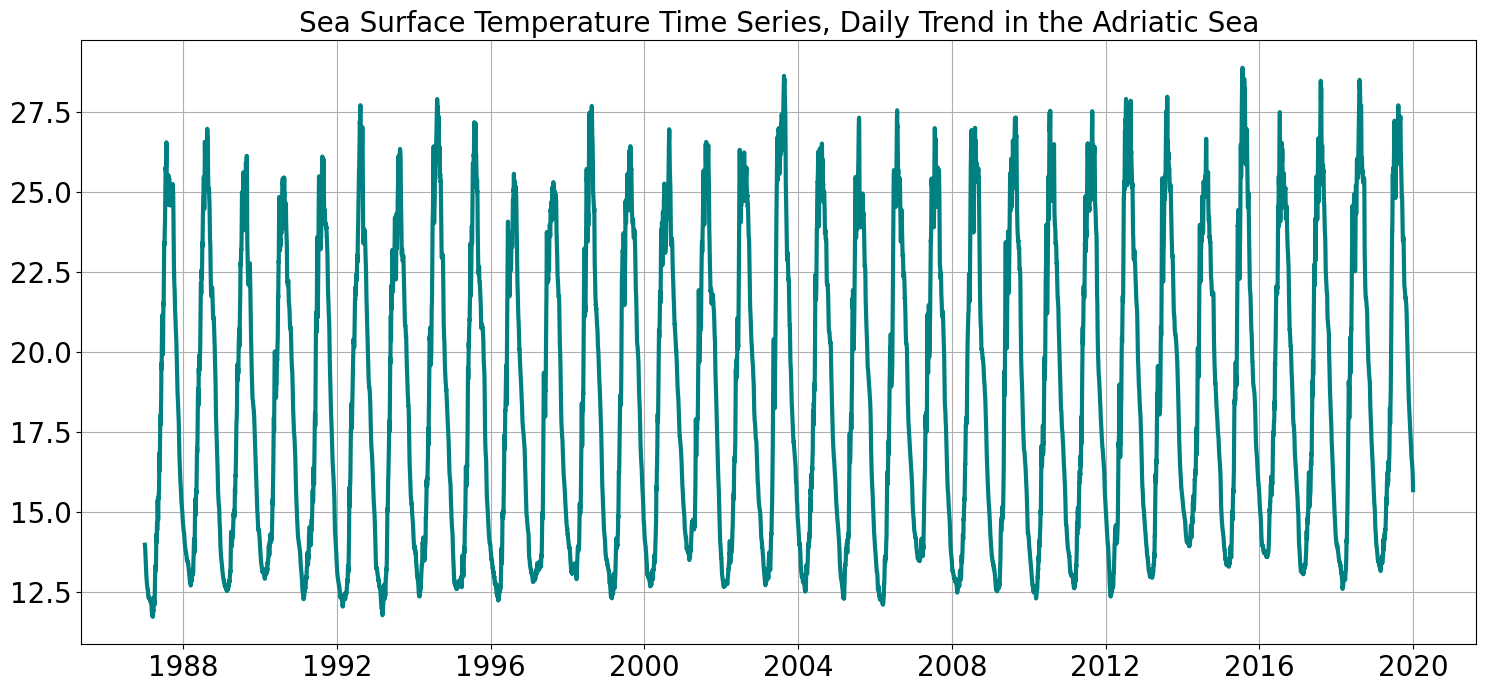

In [16]:
ts=fc.GenerateDailyTimeSeries(NcFile1DoutputCSV)

"GenerateDailyTimeSeriesSTD" function initially starts with groupby syntax to provide information on data in the "DATE" column in "Monthly Mean".

    fy_dt = file2.groupby(pd.Grouper(freq='M')).mean()

The window size equal to 12 has been choosen for the moving average calculation to  calculate standard deviation by year.

     daily_sdT = fy_dt.rolling(window = 12).std()

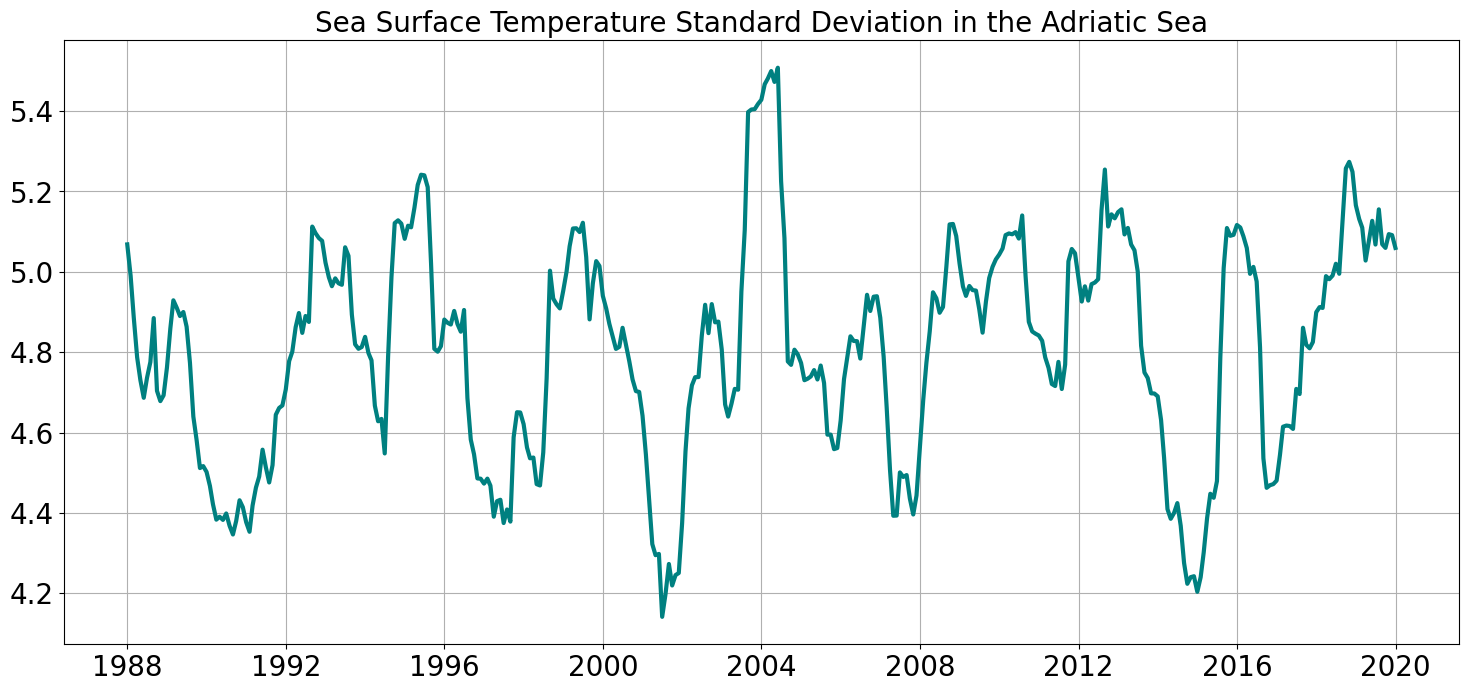

In [17]:
ts1=fc.GenerateDailyTimeSeriesSTD(NcFile1DoutputCSV)

"Generate1DTendency" function show the Annual Trend in the Adriatic Sea. The input file is 1 Dimensional file in netCDF format.
Hence, the Linear Regression has been calculated, once created the data frame for the Annual Mean.  

    fy_1D= t.mean(dim=(lat_name, lon_name), skipna=True)    
    fy_dt = fy_1D.groupby('time.year').mean()
    df = fy_dt.to_dataframe().reset_index().set_index('year')
    
The horizontal axis has "df.index" by year while vertical axis has the Temperature with the variable name "thetao" in the Cartesian coordinate system.

In [18]:
ncRawDataFileName_clipped = "Aggregations/CMEMS_SST_clipped.nc"
rawData1_clipped = xr.open_dataset(ncRawDataFileName_clipped)

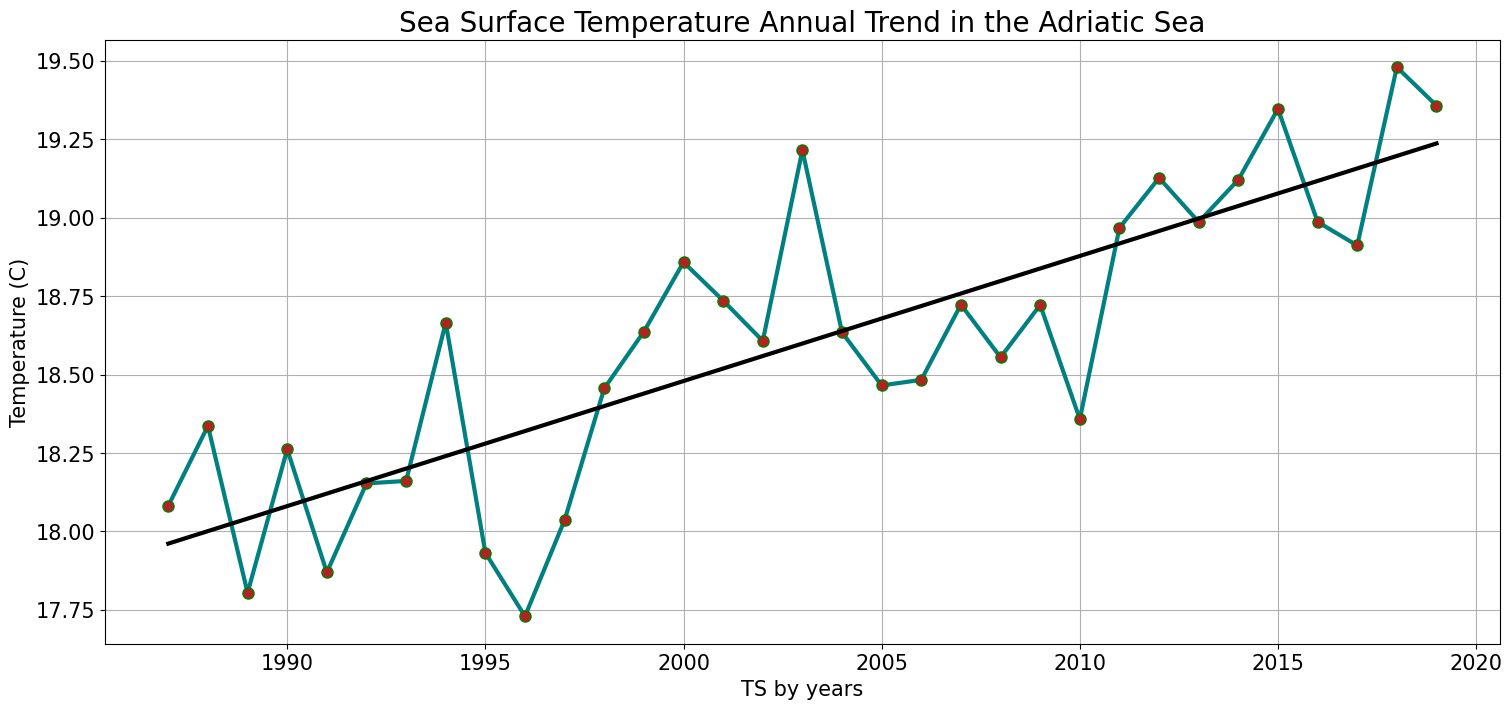

In [19]:
NcFile1Doutput = "Aggregations/CMEMS_SST_clipped_1D_FIXED_DIM.nc"
clippedfix1Tendency=fc.Generate1DTendency(rawData1_clipped,NcFile1Doutput)

The "GenerateDailyTimeSeriesPLOT" function show the Monthly Mean in Violin Plot in the Adriatic Sea. The input file is 1 Dimensional file in CSV format. The Data distribution is shown by using Seaborn Library. 
The month names are converted in their full names with: 

     file2['month'] = [d.strftime('%b') for d in file2.DATE]

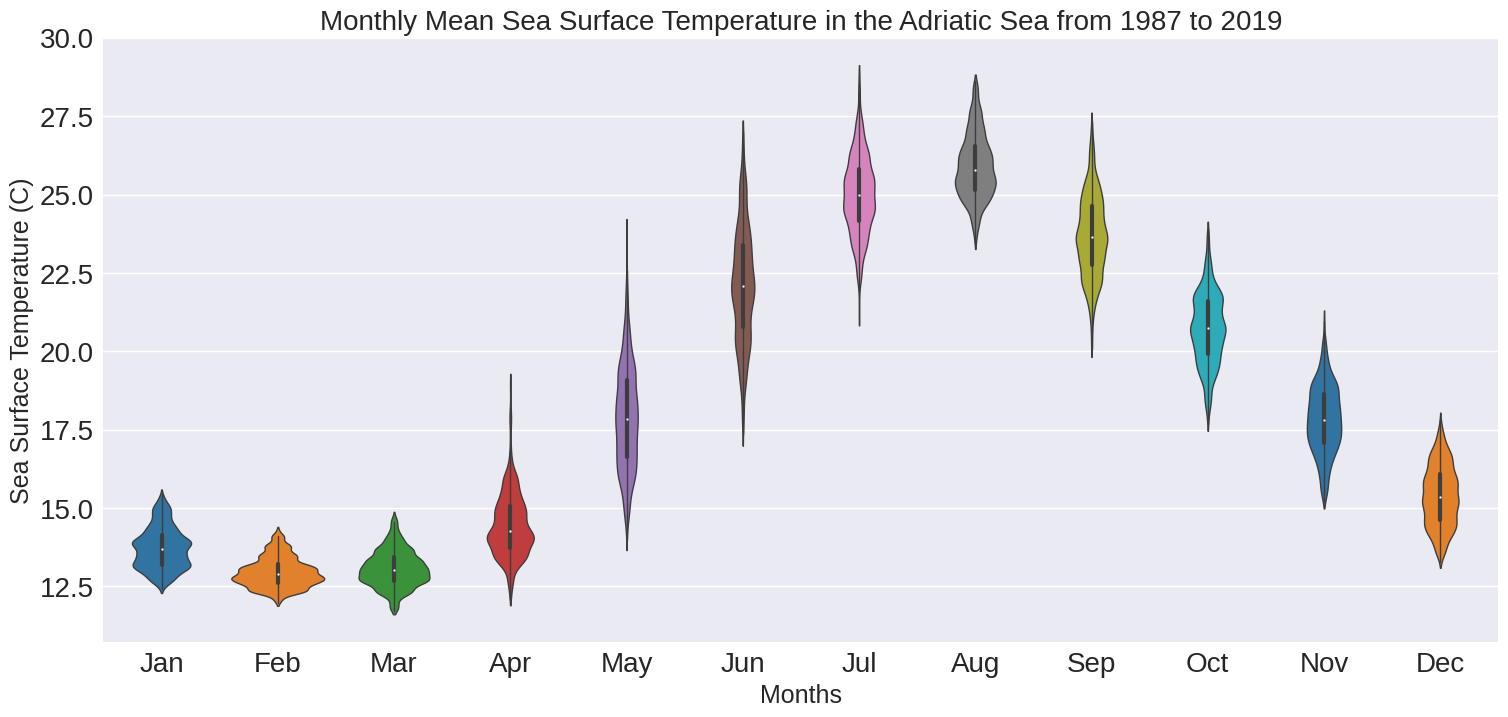

In [20]:
ts_monthly=fc.GenerateDailyTimeSeriesPLOT(NcFile1DoutputCSV)

<div class="alert alert-info" role="alert">

## <a id='TOC_TOP'></a> [Section 4](#section4): The Seasonal and Annual Mean Map Visualizations
    
[Back to top](#TOC_TOP)

Each map has been displayed with the following steps:
    
1. Loding the data variable for each selected period of time both seasonal and annual mean with dimensions of time, lat and lon and the spatial data to mask out the missing values.
2. The Mean Temperatures for each time coverage have been calculated.
3. Data masking for the area of interest through vectorized function "pygeos".
4. The Plate Carrée projection with the coastline on the map.
5. A heatmap generation for maximum and minimum temperature toghether with its contour line. 
6. The cartopy feature COASTLINE.
7. The colour bar with their maximum and minimum temperatures.


#### The dimension of all files are below.

In [21]:
t_summer = xr.open_dataset('Aggregations/CMEMS_SST_SUMMER_SEASON.nc')
t_winter = xr.open_dataset('Aggregations/CMEMS_SST_WINTER_SEASON.nc')
t_annual_mean = xr.open_dataset('Aggregations/CMEMS_SST_clipped_Annual_Mean.nc')

In [22]:
t_summer,t_winter,t_annual_mean


(<xarray.Dataset>
 Dimensions:  (lat: 146, lon: 188, year: 33)
 Coordinates:
     depth    float32 ...
   * lat      (lat) float32 39.73 39.77 39.81 39.85 ... 45.65 45.69 45.73 45.77
   * lon      (lon) float32 12.17 12.21 12.25 12.29 ... 19.83 19.88 19.92 19.96
   * year     (year) int64 1987 1988 1989 1990 1991 ... 2015 2016 2017 2018 2019
 Data variables:
     thetao   (year, lat, lon) float32 ...,
 <xarray.Dataset>
 Dimensions:  (lat: 146, lon: 188, year: 33)
 Coordinates:
     depth    float32 ...
   * lat      (lat) float32 39.73 39.77 39.81 39.85 ... 45.65 45.69 45.73 45.77
   * lon      (lon) float32 12.17 12.21 12.25 12.29 ... 19.83 19.88 19.92 19.96
   * year     (year) int64 1987 1988 1989 1990 1991 ... 2015 2016 2017 2018 2019
 Data variables:
     thetao   (year, lat, lon) float32 ...,
 <xarray.Dataset>
 Dimensions:  (lat: 146, lon: 188, year: 33)
 Coordinates:
     depth    float32 ...
   * lat      (lat) float32 39.73 39.77 39.81 39.85 ... 45.65 45.69 45.73 45.77
   * lo

In [23]:
file_csv_area_1= pd.read_csv('WEkEO_PART_1_Aggregations/WEkEO_SST_DATA/areaAdriatic.csv')


The xarray.DataArray with Summer Period and geographical coordinates is shown:

In [24]:
temp_summer = t_summer['thetao'][:,:,:]
temp_summer

<xarray.DataArray 'thetao' (year: 33, lat: 146, lon: 188)>
[905784 values with dtype=float32]
Coordinates:
    depth    float32 ...
  * lat      (lat) float32 39.73 39.77 39.81 39.85 ... 45.65 45.69 45.73 45.77
  * lon      (lon) float32 12.17 12.21 12.25 12.29 ... 19.83 19.88 19.92 19.96
  * year     (year) int64 1987 1988 1989 1990 1991 ... 2015 2016 2017 2018 2019

The xarray.DataArray with Winter Period and geographical coordinates is shown:

In [25]:
temp_winter = t_winter['thetao'][:,:,:]
temp_winter

<xarray.DataArray 'thetao' (year: 33, lat: 146, lon: 188)>
[905784 values with dtype=float32]
Coordinates:
    depth    float32 ...
  * lat      (lat) float32 39.73 39.77 39.81 39.85 ... 45.65 45.69 45.73 45.77
  * lon      (lon) float32 12.17 12.21 12.25 12.29 ... 19.83 19.88 19.92 19.96
  * year     (year) int64 1987 1988 1989 1990 1991 ... 2015 2016 2017 2018 2019

In [26]:
temp_annual_mean = t_annual_mean['thetao'][:,:,:]
temp_annual_mean

<xarray.DataArray 'thetao' (year: 33, lat: 146, lon: 188)>
[905784 values with dtype=float32]
Coordinates:
    depth    float32 ...
  * lat      (lat) float32 39.73 39.77 39.81 39.85 ... 45.65 45.69 45.73 45.77
  * lon      (lon) float32 12.17 12.21 12.25 12.29 ... 19.83 19.88 19.92 19.96
  * year     (year) int64 1987 1988 1989 1990 1991 ... 2015 2016 2017 2018 2019

##### Maximum and Minimum Mean Temperatures for each time coverage follow: 

In [27]:
temp_summer_av= np.mean(temp_summer[:],axis = 0)
temp_summer_av.min(),temp_summer_av.max()

(<xarray.DataArray 'thetao' ()>
 array(20.6577, dtype=float32)
 Coordinates:
     depth    float32 1.018,
 <xarray.DataArray 'thetao' ()>
 array(25.221352, dtype=float32)
 Coordinates:
     depth    float32 1.018)

In [28]:
temp_winter_av= np.mean(temp_winter[:],axis = 0)
temp_winter_av.min(),temp_winter_av.max()

(<xarray.DataArray 'thetao' ()>
 array(9.44431, dtype=float32)
 Coordinates:
     depth    float32 1.018,
 <xarray.DataArray 'thetao' ()>
 array(15.3477745, dtype=float32)
 Coordinates:
     depth    float32 1.018)

In [29]:
temp_annual_mean_av= np.mean(temp_annual_mean[:],axis = 0)
temp_annual_mean_av.min(),temp_annual_mean_av.max()

(<xarray.DataArray 'thetao' ()>
 array(16.09838, dtype=float32)
 Coordinates:
     depth    float32 1.018,
 <xarray.DataArray 'thetao' ()>
 array(20.021091, dtype=float32)
 Coordinates:
     depth    float32 1.018)

In [30]:
lon_name_summer   = temp_summer.lon[:]
lat_name_summer   = temp_summer.lat[:]

lon_name_winter   = temp_winter.lon[:]
lat_name_winter   = temp_winter.lat[:]

lon_name_annual_mean   = temp_annual_mean.lon[:]
lat_name_annual_mean   = temp_annual_mean.lat[:]

### Mask area for the Adriatic Sea during the Summer Season

In [31]:
outline_adriatic = np.array(file_csv_area_1)

region_area_adriatic = regionmask.Regions([outline_adriatic])

In [32]:
mask_pygeos_area_summer = region_area_adriatic.mask(t_summer.thetao, method="pygeos")
LON, LAT = np.meshgrid(lon_name_summer, lat_name_summer)

/opt/conda/lib/python3.8/site-packages/pygeos/io.py:85: UserWarning: The shapely GEOS version (3.11.0-CAPI-1.17.0) is incompatible with the PyGEOS GEOS version (3.10.1-CAPI-1.16.0). Conversions between both will be slow
  warnings.warn(


In [33]:
thetao_area_summer = temp_summer_av.values
thetao_area_summer[np.isnan(mask_pygeos_area_summer)] = np.nan

In [34]:
thetao_area_summer

array([[      nan,       nan,       nan, ...,       nan,       nan,
              nan],
       [      nan,       nan,       nan, ...,       nan,       nan,
              nan],
       [      nan,       nan,       nan, ...,       nan, 23.820696,
        23.96131 ],
       ...,
       [      nan,       nan,       nan, ...,       nan,       nan,
              nan],
       [      nan,       nan,       nan, ...,       nan,       nan,
              nan],
       [      nan,       nan,       nan, ...,       nan,       nan,
              nan]], dtype=float32)

### Mask area for the Adriatic Sea during the Winter Season

In [35]:
mask_pygeos_area_winter = region_area_adriatic.mask(t_winter.thetao, method="pygeos")
LON1, LAT1 = np.meshgrid(lon_name_winter, lat_name_winter)

In [36]:
thetao_area_winter = temp_winter_av.values
thetao_area_winter[np.isnan(mask_pygeos_area_winter)] = np.nan

In [37]:
thetao_area_winter

array([[      nan,       nan,       nan, ...,       nan,       nan,
              nan],
       [      nan,       nan,       nan, ...,       nan,       nan,
              nan],
       [      nan,       nan,       nan, ...,       nan, 14.702645,
        14.63934 ],
       ...,
       [      nan,       nan,       nan, ...,       nan,       nan,
              nan],
       [      nan,       nan,       nan, ...,       nan,       nan,
              nan],
       [      nan,       nan,       nan, ...,       nan,       nan,
              nan]], dtype=float32)

### Mask area for the Adriatic Sea for the Annual Mean

In [38]:
mask_pygeos_area_annual_mean = region_area_adriatic.mask(t_annual_mean.thetao, method="pygeos")
LON2, LAT2 = np.meshgrid(lon_name_annual_mean, lat_name_annual_mean)

In [39]:
thetao_area_annual_mean = temp_annual_mean_av.values
thetao_area_annual_mean[np.isnan(mask_pygeos_area_annual_mean)] = np.nan

In [40]:
thetao_area_annual_mean

array([[      nan,       nan,       nan, ...,       nan,       nan,
              nan],
       [      nan,       nan,       nan, ...,       nan,       nan,
              nan],
       [      nan,       nan,       nan, ...,       nan, 19.334784,
        19.379007],
       ...,
       [      nan,       nan,       nan, ...,       nan,       nan,
              nan],
       [      nan,       nan,       nan, ...,       nan,       nan,
              nan],
       [      nan,       nan,       nan, ...,       nan,       nan,
              nan]], dtype=float32)

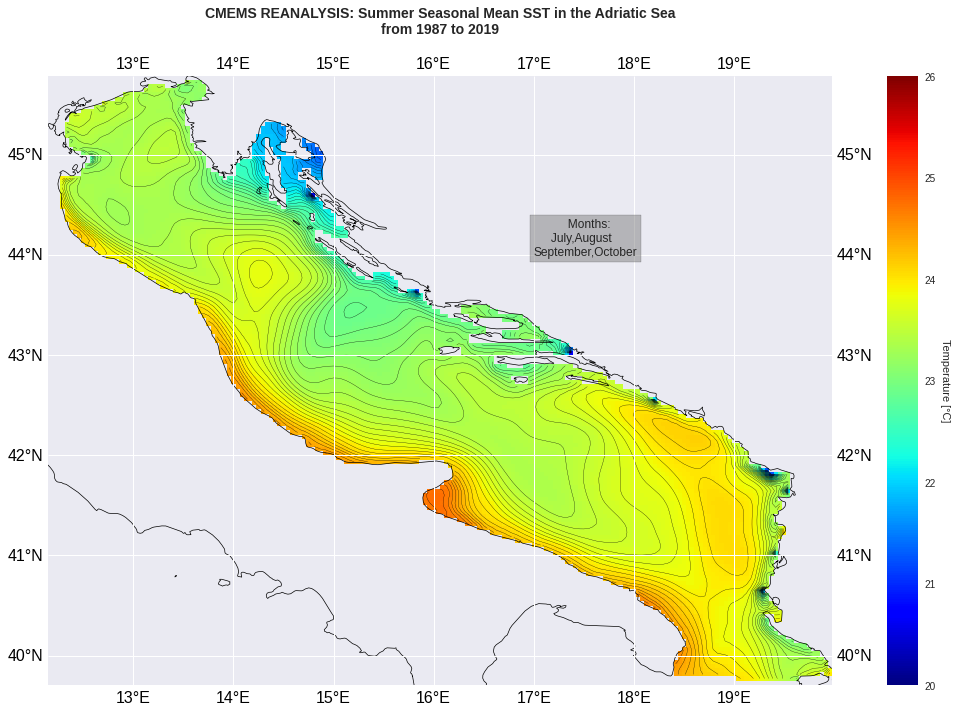

In [41]:
fig = plt.figure(figsize=(16, 10))
ax = plt.subplot(projection=ccrs.PlateCarree())

heatmap=temp_summer_av.plot(
    ax=ax,
    x="lon",
    y="lat",
    transform=ccrs.PlateCarree(),
    cmap="jet",
    shading="auto",
    add_colorbar=False,
    vmin=20,
    vmax=26
)
lines=temp_summer_av.plot.contour(ax=ax,alpha=1,linewidths=0.3,colors = 'k',linestyles='None',levels=60)
# the level of contour lines= (vmax-vmin)*10


g1 = ax.gridlines(draw_labels = True)
g1.xlabel_style = {'size': 16, 'color': 'k'}
g1.ylabel_style = {'size': 16, 'color': 'k'}
#add embellishment


ax.add_feature(cfeature.COASTLINE,linewidths=0.7,alpha=0.9999)



plt.title("CMEMS REANALYSIS: Summer Seasonal Mean SST in the Adriatic Sea\nfrom 1987 to 2019\n",fontweight='bold', size=14)
cbar = plt.colorbar(heatmap)
cbar.ax.set_ylabel('Temperature [°C]',labelpad=+14, rotation=270)

plt.text(17,44,'          Months:\n     July,August\nSeptember,October',fontsize=12,bbox = dict(facecolor = 'gray', alpha = 0.5))
plt.tight_layout()
plt.savefig('image_outputs/SummerSeasonalMean.png')

plt.show()

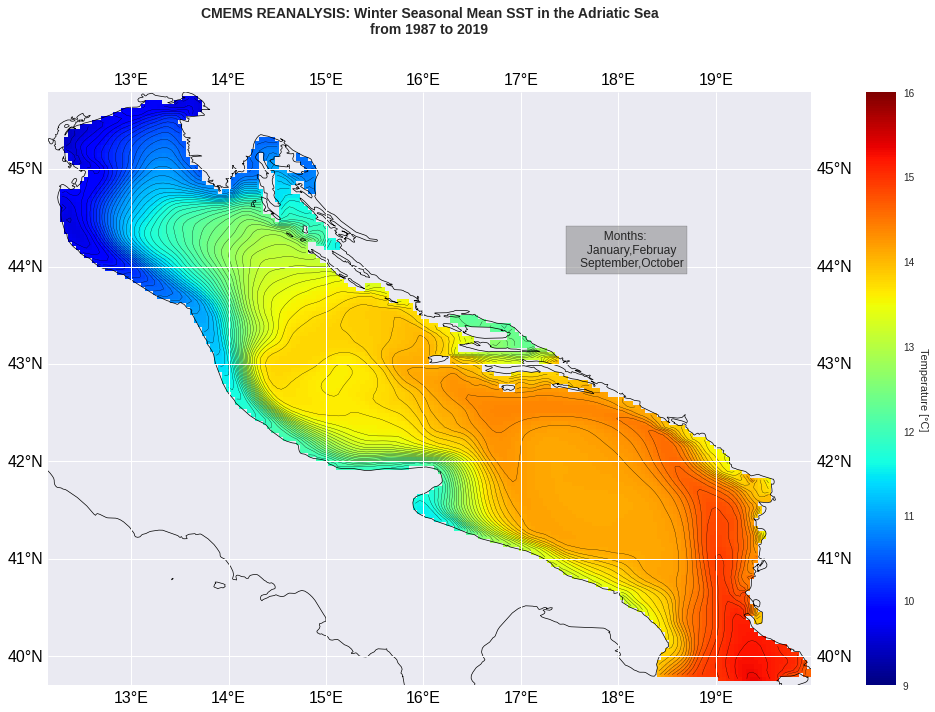

In [42]:
fig = plt.figure(figsize=(16, 10))
ax = plt.subplot(projection=ccrs.PlateCarree())
heatmap=temp_winter_av.plot(
    ax=ax,
    x="lon",
    y="lat",
    transform=ccrs.PlateCarree(),
    cmap="jet",
    shading="auto",
    add_colorbar=False,
    vmin=9,
    vmax=16
)

lines=temp_winter_av.plot.contour(ax=ax,alpha=1,linewidths=0.3,colors = 'k',linestyles='None',levels=70)
# the level of contour lines= (vmax-vmin)*10

g1 = ax.gridlines(draw_labels = True)
g1.xlabel_style = {'size': 16, 'color': 'k'}
g1.ylabel_style = {'size': 16, 'color': 'k'}
#add embellishment




ax.add_feature(cfeature.COASTLINE,linewidths=0.7,alpha=0.9999)



plt.title("CMEMS REANALYSIS: Winter Seasonal Mean SST in the Adriatic Sea\nfrom 1987 to 2019\n\n",fontweight='bold', size=14)
cbar = plt.colorbar(heatmap)
cbar.ax.set_ylabel('Temperature [°C]', labelpad=+14,rotation=270)

plt.text(17.5,44,'          Months:\n     January,Februay\n   September,October',fontsize=12,bbox = dict(facecolor = 'gray', alpha = 0.5))
plt.tight_layout()
plt.savefig('image_outputs/WinterSeasonalMean.png')

plt.show()

/tmp/ipykernel_13902/1824992949.py:30: MatplotlibDeprecationWarning: Starting from Matplotlib 3.6, colorbar() will steal space from the mappable's axes, rather than from the current axes, to place the colorbar.  To silence this warning, explicitly pass the 'ax' argument to colorbar().
  cbar = plt.colorbar(heatmap)


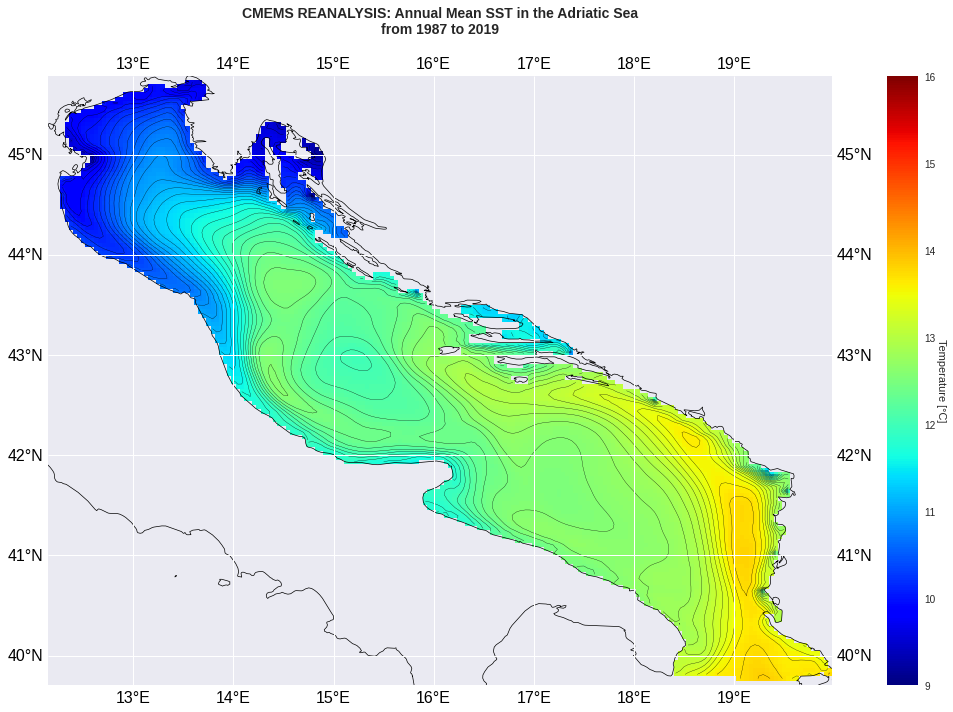

In [43]:
fig = plt.figure(figsize=(16, 10))
ax = plt.subplot(projection=ccrs.PlateCarree())
hetmap=temp_annual_mean_av.plot(
    ax=ax,
    x="lon",
    y="lat",
    transform=ccrs.PlateCarree(),
    cmap="jet",
    shading="auto",
    add_colorbar=False,
    vmin=16,
    vmax=21
)

lines=temp_annual_mean_av.plot.contour(ax=ax,alpha=1,linewidths=0.3,colors = 'k',linestyles='None',levels=50)
# the level of contour lines= (vmax-vmin)*10

g1 = ax.gridlines(draw_labels = True)
g1.xlabel_style = {'size': 16, 'color': 'k'}
g1.ylabel_style = {'size': 16, 'color': 'k'}
#add embellishment




ax.add_feature(cfeature.COASTLINE,linewidths=0.7,alpha=0.9999)

plt.title("CMEMS REANALYSIS: Annual Mean SST in the Adriatic Sea\nfrom 1987 to 2019\n",fontweight='bold', size=14)

cbar = plt.colorbar(heatmap)
cbar.ax.set_ylabel('Temperature [°C]', labelpad=+10, rotation=270)


plt.tight_layout()
plt.savefig('image_outputs/AnnualSeasonalMean.png')

plt.show()

<div class="alert alert-info" role="alert">

## <a id='TOC_TOP'></a> [Section 5](#section5): The Seasonal Anomalies Map Visualizations.
    
[Back to top](#TOC_TOP)

Load previously generated files to calculate the Seasonal Anomalies:
1. "Aggregations/CMEMS_SST_SUMMER_SEASON.nc"
2. "Aggregations/CMEMS_SST_WINTER_SEASON.nc"

And,

3. "WEkEO_PART_1_Aggregations/areaAdriatic.csv" to Mask out the missing values.

The Seasonal Anomalies have been calculated through "computeSenSlopeMap" function.
"Sen Slope" is a method for robust linear regression. It computes the slope as the median of all slopes (in our case all seasonal mean) between paired values.


The "xr.apply_ufunc" is a vectorization function for unlabeled arrays on xarray objects and used to create seasonal maps.

In [44]:
ncRawDataFileName_summer = "Aggregations/CMEMS_SST_SUMMER_SEASON.nc"
ncRawDataFileName_winter = "Aggregations/CMEMS_SST_WINTER_SEASON.nc"

In [45]:
NcFileDoutput_summer_anomal = "Aggregations/SummerAnomalyOutput.nc"
NcFileDoutput_winter_anomal = "Aggregations/WinterAnomalyOutput.nc"

In [46]:
rawData_SUMMER_anomaly = xr.open_dataset(ncRawDataFileName_summer)
rawData_WINTER_anomaly = xr.open_dataset(ncRawDataFileName_winter)


In [47]:
summerAnomalyFile=fc.computeSenSlopeMap(ncRawDataFileName_summer,NcFileDoutput_summer_anomal)

Output: <xarray.Dataset>
Dimensions:  (lat: 146, lon: 188)
Coordinates:
    depth    float32 ...
  * lat      (lat) float32 39.73 39.77 39.81 39.85 ... 45.65 45.69 45.73 45.77
  * lon      (lon) float32 12.17 12.21 12.25 12.29 ... 19.83 19.88 19.92 19.96
Data variables:
    thetao   (lat, lon) float64 0.03278 0.0315 0.03187 0.03103 ... nan nan nan
output  min: <xarray.DataArray 'thetao' ()>
array(0.01442564)
Coordinates:
    depth    float32 ...
output max: <xarray.DataArray 'thetao' ()>
array(0.0502005)
Coordinates:
    depth    float32 ...


In [48]:
winterAnomalyFile=fc.computeSenSlopeMap(ncRawDataFileName_winter,NcFileDoutput_winter_anomal)

Output: <xarray.Dataset>
Dimensions:  (lat: 146, lon: 188)
Coordinates:
    depth    float32 ...
  * lat      (lat) float32 39.73 39.77 39.81 39.85 ... 45.65 45.69 45.73 45.77
  * lon      (lon) float32 12.17 12.21 12.25 12.29 ... 19.83 19.88 19.92 19.96
Data variables:
    thetao   (lat, lon) float64 0.01877 0.01959 0.01985 0.01864 ... nan nan nan
output  min: <xarray.DataArray 'thetao' ()>
array(0.01317847)
Coordinates:
    depth    float32 ...
output max: <xarray.DataArray 'thetao' ()>
array(0.05237167)
Coordinates:
    depth    float32 ...


In [49]:
summer_anomaly_vis = xr.open_dataset("Aggregations/SummerAnomalyOutput.nc")

In [50]:
lon_name_summer   = summer_anomaly_vis.lon[:]
lat_name_summer  = summer_anomaly_vis.lat[:]
time_name_summer  = 'year'
depth_name_summer = 'depth'
temp_summer = summer_anomaly_vis.thetao[:]

In [51]:
outline_1 = np.array(file_csv_area_1)

region_area_1 = regionmask.Regions([outline_1])

In [52]:
mask_pygeos_area_1 = region_area_1.mask(summer_anomaly_vis.thetao, method="pygeos")
LON, LAT = np.meshgrid(lon_name_summer, lat_name_summer)

In [53]:
thetao_area_1 = summer_anomaly_vis.thetao.values
thetao_area_1[np.isnan(mask_pygeos_area_1)] = np.nan

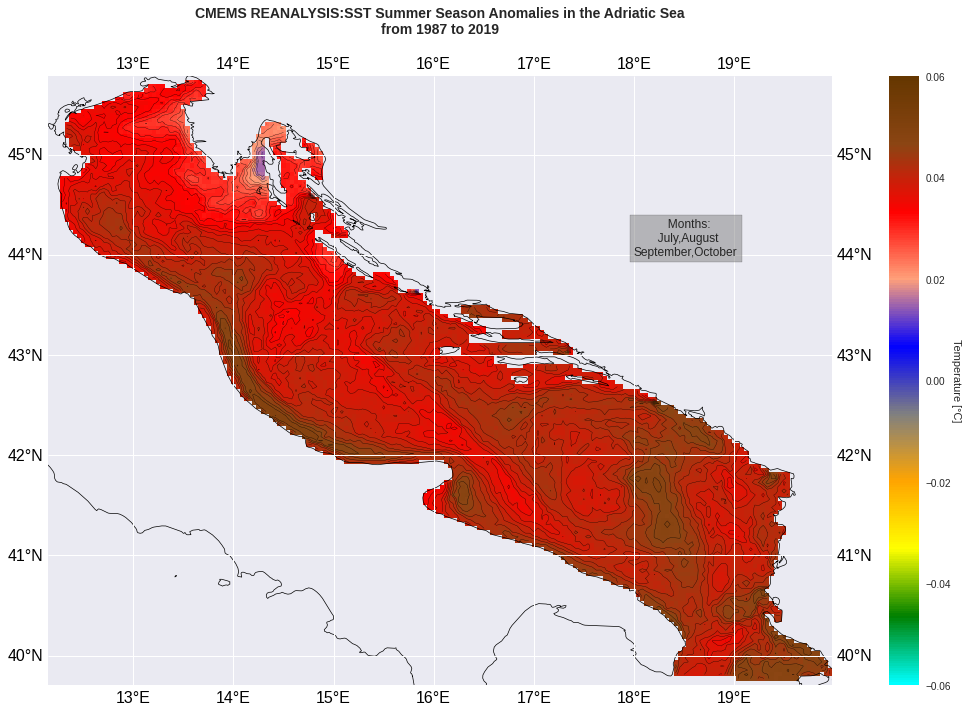

In [54]:
fig = plt.figure(figsize=(16, 10))
ax = plt.subplot(projection=ccrs.PlateCarree())
cmap = matplotlib.colors.LinearSegmentedColormap.from_list("", ["#653700","saddlebrown","red","lightsalmon","blue","gray","orange","yellow","green","cyan"]) 
#new colorbar generation

heatmap=summer_anomaly_vis.thetao.plot(
    ax=ax,
    x="lon",
    y="lat",
    transform=ccrs.PlateCarree(),
    cmap=cmap.reversed(),
    shading="auto",
    add_colorbar=False,
    vmin=-0.06,
    vmax=0.06
)

lines=summer_anomaly_vis.thetao.plot.contour(ax=ax,alpha=1,linewidths=0.3,colors = 'k',linestyles='None',levels=30)

g1 = ax.gridlines(draw_labels = True)
g1.xlabel_style = {'size': 16, 'color': 'k'}
g1.ylabel_style = {'size': 16, 'color': 'k'}
#add embellishment




ax.add_feature(cfeature.COASTLINE,linewidths=0.7,alpha=0.9999)


plt.title("CMEMS REANALYSIS:SST Summer Season Anomalies in the Adriatic Sea\nfrom 1987 to 2019\n",fontweight='bold', size=14)

plt.tight_layout()
plt.savefig('image_outputs/SummerSEasonAnnomalies.png')

cbar = plt.colorbar(heatmap)
cbar.ax.set_ylabel('Temperature [°C]',labelpad=+10, rotation=270)

plt.text(18,44,'          Months:\n       July,August\nSeptember,October',fontsize=12,bbox = dict(facecolor = 'gray', alpha = 0.5))

plt.tight_layout()

plt.show()

In [55]:
winter_anomaly_vis = xr.open_dataset("Aggregations/WinterAnomalyOutput.nc")

In [56]:
lon_name_winter   = winter_anomaly_vis.lon[:]
lat_name_winter  = winter_anomaly_vis.lat[:]
time_name_winter  = 'year'
depth_name_winter = 'depth'
temp_winter = winter_anomaly_vis.thetao[:]

In [57]:
outline_1 = np.array(file_csv_area_1)

region_area_1 = regionmask.Regions([outline_1])

In [58]:
mask_pygeos_area_1 = region_area_1.mask(winter_anomaly_vis.thetao, method="pygeos")
LON, LAT = np.meshgrid(lon_name_winter, lat_name_winter)

In [59]:
thetao_area_1 = winter_anomaly_vis.thetao.values
thetao_area_1[np.isnan(mask_pygeos_area_1)] = np.nan

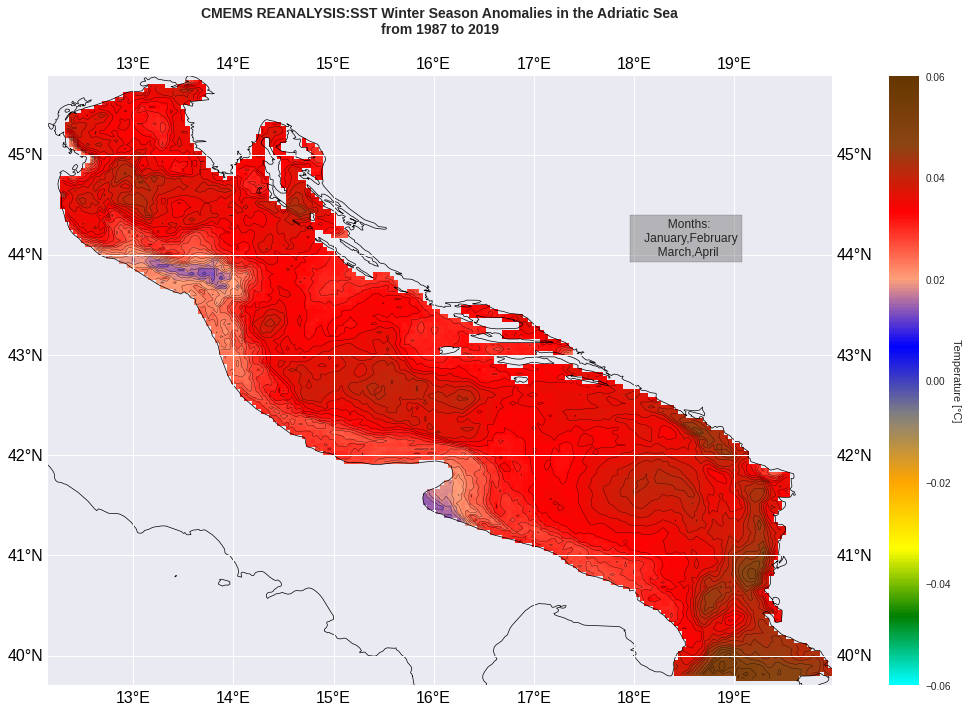

In [60]:
fig = plt.figure(figsize=(16, 10))
ax = plt.subplot(projection=ccrs.PlateCarree())
cmap = matplotlib.colors.LinearSegmentedColormap.from_list("", ["#653700","saddlebrown","red","lightsalmon","blue","gray","orange","yellow","green","cyan"]) 
#new colorbar generation

heatmap=winter_anomaly_vis.thetao.plot(
    ax=ax,
    x="lon",
    y="lat",
    transform=ccrs.PlateCarree(),
    cmap=cmap.reversed(),
    shading="auto",
    add_colorbar=False,
    vmin=-0.06,
    vmax=0.06
)

lines=winter_anomaly_vis.thetao.plot.contour(ax=ax,alpha=1,linewidths=0.3,colors = 'k',linestyles='None',levels=30)

g1 = ax.gridlines(draw_labels = True)
g1.xlabel_style = {'size': 16, 'color': 'k'}
g1.ylabel_style = {'size': 16, 'color': 'k'}
#add embellishment




ax.add_feature(cfeature.COASTLINE,linewidths=0.7,alpha=0.9999)


plt.title("CMEMS REANALYSIS:SST Winter Season Anomalies in the Adriatic Sea\nfrom 1987 to 2019\n",fontweight='bold', size=14)

plt.tight_layout()
plt.savefig('image_outputs/WinterSEasonAnnomalies.png')

cbar = plt.colorbar(heatmap)
cbar.ax.set_ylabel('Temperature [°C]',labelpad=+10, rotation=270)

plt.text(18,44,'          Months:\n   January,February\n       March,April',fontsize=12,bbox = dict(facecolor = 'gray', alpha = 0.5))

plt.tight_layout()

plt.show()

<div class="alert alert-info" role="alert">

## <a id='TOC_TOP'></a> [Section 6](#section6): References
    

"The Adriatic Sea General Circulation. Part I: Air–Sea Interactions and Water Mass Structure"  <a href="https://doi.org/10.1175/1520-0485(1997)027" target="_blank">DOI</a>
    

<div class="alert alert-block alert-warning">

### Challenge:
<a href="https://doi.org/10.1175/1520-0485(1997)027<1492:TASGCP>2.0.CO;2" target="_blank">DOI</a>. 
<div>